# **How to Speed Up Data Cleaning with the klib Python library**

Chanin Nantasenamat

[Data Professor YouTube channel](http://youtube.com/dataprofessor), http://youtube.com/dataprofessor

---
**Further reading:**
* [Andreas Kanz @ Medium](https://medium.com/@akanz)
* [klib Examples on GitHub](https://github.com/akanz1/klib/tree/main/examples)
* [klib on Towards Data Science](https://towardsdatascience.com/speed-up-your-data-cleaning-and-preprocessing-with-klib-97191d320f80)
* [klib Documentation](https://klib.readthedocs.io/en/latest/)

# **Install klib**

In [ ]:
! pip install klib

# **Missing Values Plot**

Here we can examine the data quality. In other words, how clean is the dataset?

***missingval_plot()*** - provides a high-level overview of the missing values in a dataset. It pinpoints which columns and rows to examine in more detail.

**Top** portion of the plot shows the aggregate for each column. Summary statistics is displayed on the right most side.

**Bottom** portion of the plot shows the missing values (black colors) in the DataFrame.

GridSpec(6, 6)

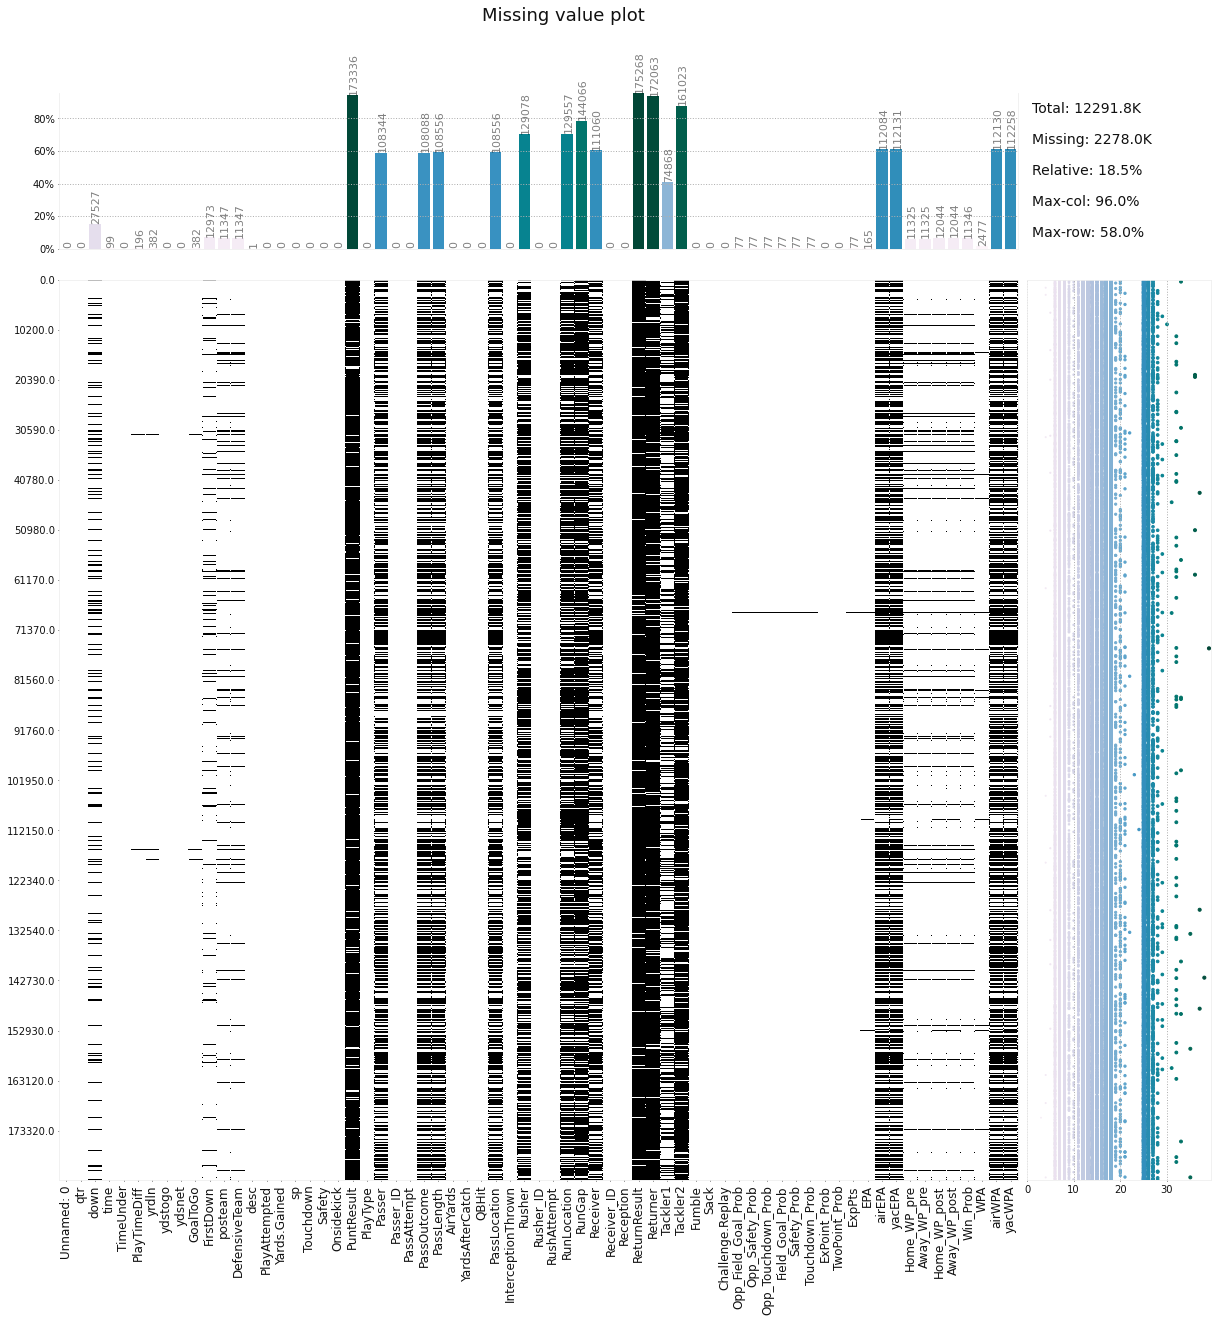

In [ ]:
# NFL Dataset
import klib
import pandas as pd

df = pd.read_csv('https://github.com/akanz1/klib/raw/main/examples/NFL_DATASET.csv')
klib.missingval_plot(df)

# **Data Cleaning**

The ***data_cleaning()*** function essentially drops empty and single valued columns as well as empty and duplicate rows.

In [ ]:
df_cleaned = klib.data_cleaning(df)

Shape of cleaned data: (183460, 63) - Remaining NAs: 1757318

Changes:
Dropped rows: 0
     of which 0 duplicates. (Rows: [])
Dropped columns: 4
     of which 1 single valued. (Columns: ['PlayAttempted'])
Dropped missing values: 520667
Reduced memory by at least: 59.37 MB (-63.3%)


# **Correlation Plot**

Here, we can examine the intercorrelation amongst the features.

### Display all correlations data.

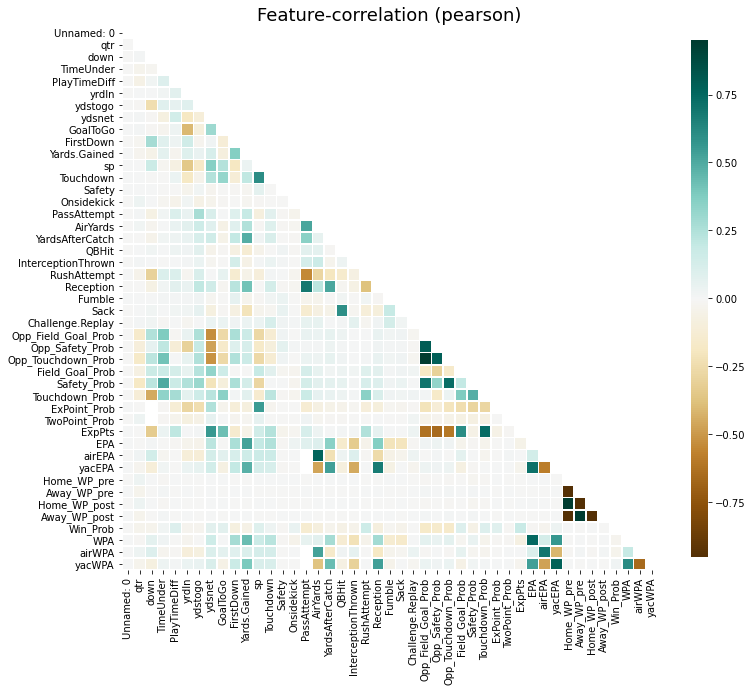

In [ ]:
klib.corr_plot(df_cleaned, annot=False)

### Display only positive correlation.

Displaying positive correlations. Use "threshold" to further limit the results.


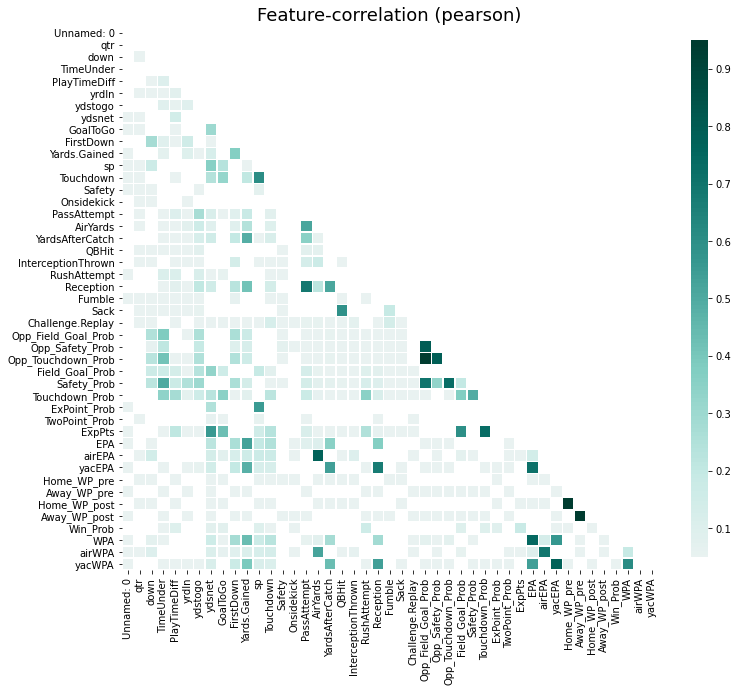

In [ ]:
klib.corr_plot(df_cleaned, split='pos', annot=False)

### Display only negative correlation.

Displaying negative correlations. Use "threshold" to further limit the results.


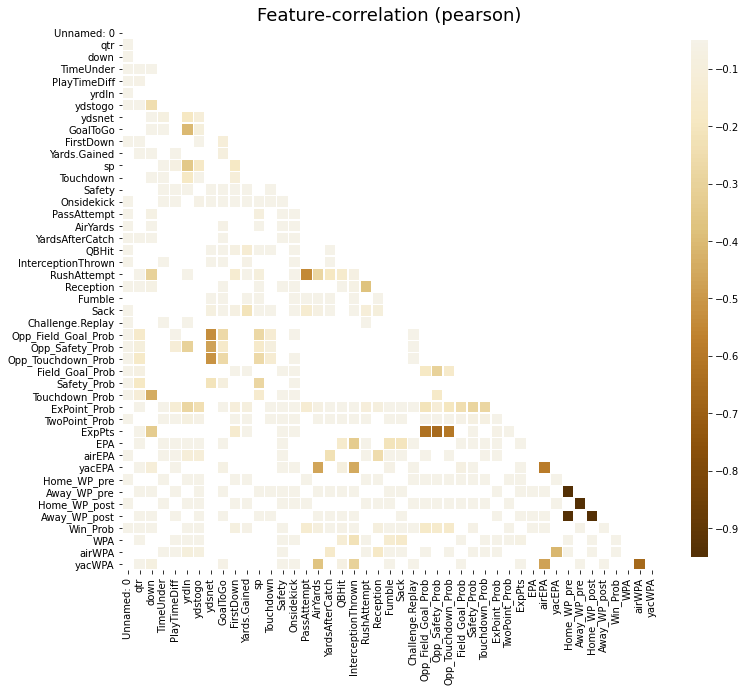

In [ ]:
klib.corr_plot(df_cleaned, split='neg', annot=False)

Display correlation with a target variable of interest

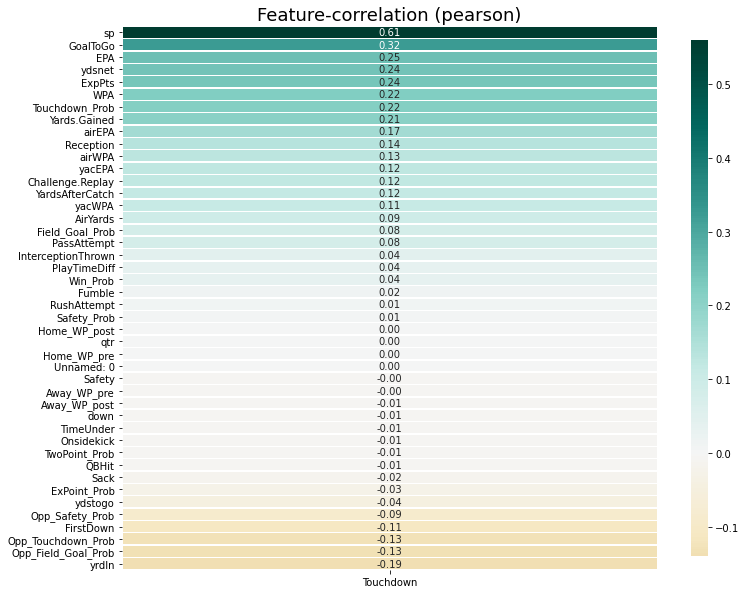

In [ ]:
klib.corr_plot(df_cleaned, target='Touchdown')

### Correlation data matrix

In [ ]:
klib.corr_mat(df_cleaned)

,Unnamed: 0,qtr,down,TimeUnder,PlayTimeDiff,yrdln,ydstogo,ydsnet,GoalToGo,FirstDown,Yards.Gained,sp,Touchdown,Safety,Onsidekick,PassAttempt,AirYards,YardsAfterCatch,QBHit,InterceptionThrown,RushAttempt,Reception,Fumble,Sack,Challenge.Replay,Opp_Field_Goal_Prob,Opp_Safety_Prob,Opp_Touchdown_Prob,Field_Goal_Prob,Safety_Prob,Touchdown_Prob,ExPoint_Prob,TwoPoint_Prob,ExpPts,EPA,airEPA,yacEPA,Home_WP_pre,Away_WP_pre,Home_WP_post,Away_WP_post,Win_Prob,WPA,airWPA,yacWPA
Unnamed: 0,1.00,-0.00,-0.00,-0.00,-0.01,-0.00,-0.00,0.00,0.00,-0.00,0.00,0.00,0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
qtr,-0.00,1.00,0.01,-0.03,-0.06,0.00,-0.01,0.01,0.01,-0.02,-0.02,0.00,0.00,0.00,0.04,0.01,0.02,-0.01,0.01,0.01,-0.04,-0.00,0.00,0.01,0.01,-0.16,-0.10,-0.17,-0.07,-0.18,-0.11,-0.01,0.04,-0.00,-0.00,0.02,-0.02,0.04,-0.03,0.04,-0.03,-0.03,-0.01,0.04,-0.04
down,-0.00,0.01,1.00,-0.02,0.02,0.01,-0.24,-0.01,-0.01,0.28,-0.05,0.17,-0.01,0.00,0.00,-0.06,-0.03,-0.04,0.02,0.01,-0.30,-0.06,0.00,0.02,0.02,0.25,0.07,0.22,0.17,0.22,-0.45,-,-,-0.33,0.01,0.15,-0.11,0.00,-0.00,0.00,-0.00,-0.03,0.07,0.10,-0.08
TimeUnder,-0.00,-0.03,-0.02,1.00,0.10,0.02,0.09,-0.07,-0.02,0.09,0.07,-0.02,-0.01,-0.00,-0.02,0.02,0.00,0.02,0.00,-0.01,0.11,0.02,0.01,0.00,-0.01,0.38,0.21,0.41,0.17,0.50,0.34,-0.01,-0.01,0.04,-0.01,-0.02,0.02,-0.01,0.01,-0.01,0.01,0.02,0.03,-0.03,0.03
PlayTimeDiff,-0.01,-0.06,0.02,0.10,1.00,0.08,0.06,0.15,0.04,0.03,-0.02,-0.07,0.04,-0.00,-0.04,0.10,0.05,0.04,0.03,0.00,0.11,0.07,0.01,0.02,0.00,-0.01,-0.11,0.00,0.13,0.18,0.28,-0.12,-0.03,0.21,-0.01,-0.01,-0.00,0.00,-0.00,0.00,-0.00,0.10,-0.01,-0.01,0.01
yrdln,-0.00,0.00,0.01,0.02,0.08,1.00,0.08,-0.19,-0.41,0.15,0.09,-0.34,-0.19,-0.03,0.02,0.05,0.08,0.05,0.03,0.01,-0.02,0.05,0.01,0.02,-0.02,0.05,-0.30,0.05,0.05,0.25,0.07,-0.28,-0.08,0.01,-0.04,-0.11,0.04,-0.01,0.01,-0.00,0.00,-0.02,-0.03,-0.10,0.04
ydstogo,-0.00,-0.01,-0.24,0.09,0.06,0.08,1.00,-0.11,-0.09,-0.03,0.05,-0.17,-0.04,0.02,-0.05,0.27,0.16,0.12,0.08,0.04,0.12,0.20,0.02,0.06,0.01,0.26,0.19,0.25,0.24,0.31,0.16,-0.24,-0.06,0.01,-0.04,-0.11,0.06,-0.00,-0.00,-0.00,-0.00,-0.02,-0.00,-0.07,0.05
ydsnet,0.00,0.01,-0.01,-0.07,0.15,-0.19,-0.11,1.00,0.30,0.03,0.12,0.36,0.24,-0.02,-0.03,0.11,0.08,0.15,-0.04,-0.02,0.01,0.15,-0.02,-0.08,0.04,-0.53,-0.47,-0.52,0.33,-0.21,0.23,0.25,0.06,0.56,0.22,0.14,0.15,0.00,0.00,0.00,0.00,0.08,0.16,0.11,0.11
GoalToGo,0.00,0.01,-0.01,-0.02,0.04,-0.41,-0.09,0.30,1.00,-0.11,-0.09,0.24,0.32,-0.00,-0.01,0.01,-0.06,-0.05,-0.01,-0.00,0.06,-0.02,-0.00,-0.01,0.04,-0.26,-0.16,-0.26,0.16,-0.09,0.36,-0.04,0.00,0.43,-0.00,0.08,-0.07,0.00,-0.00,0.00,-0.00,0.08,0.00,0.07,-0.06
FirstDown,-0.00,-0.02,0.28,0.09,0.03,0.15,-0.03,0.03,-0.11,1.00,0.37,-0.19,-0.11,-0.01,-0.01,0.09,0.08,0.20,-0.07,0.14,-0.14,0.22,0.06,-0.07,0.03,0.27,0.10,0.25,-0.00,0.27,0.01,-0.11,-0.03,-0.14,0.27,0.12,0.20,-0.00,0.00,-0.00,0.00,-0.08,0.28,0.09,0.18


# **Distribution Plot**

Displays the distribution plot for columns of interest.

Dropped 11346 missing values from column Win_Prob.


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


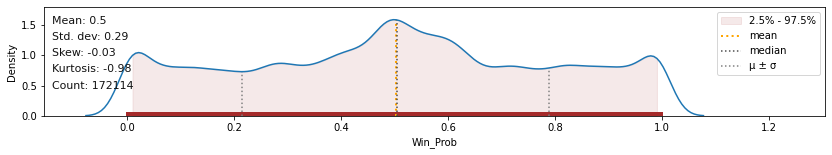

In [ ]:
klib.dist_plot(df_cleaned['Win_Prob'])

# **Categorical Plot**

GridSpec(6, 21)

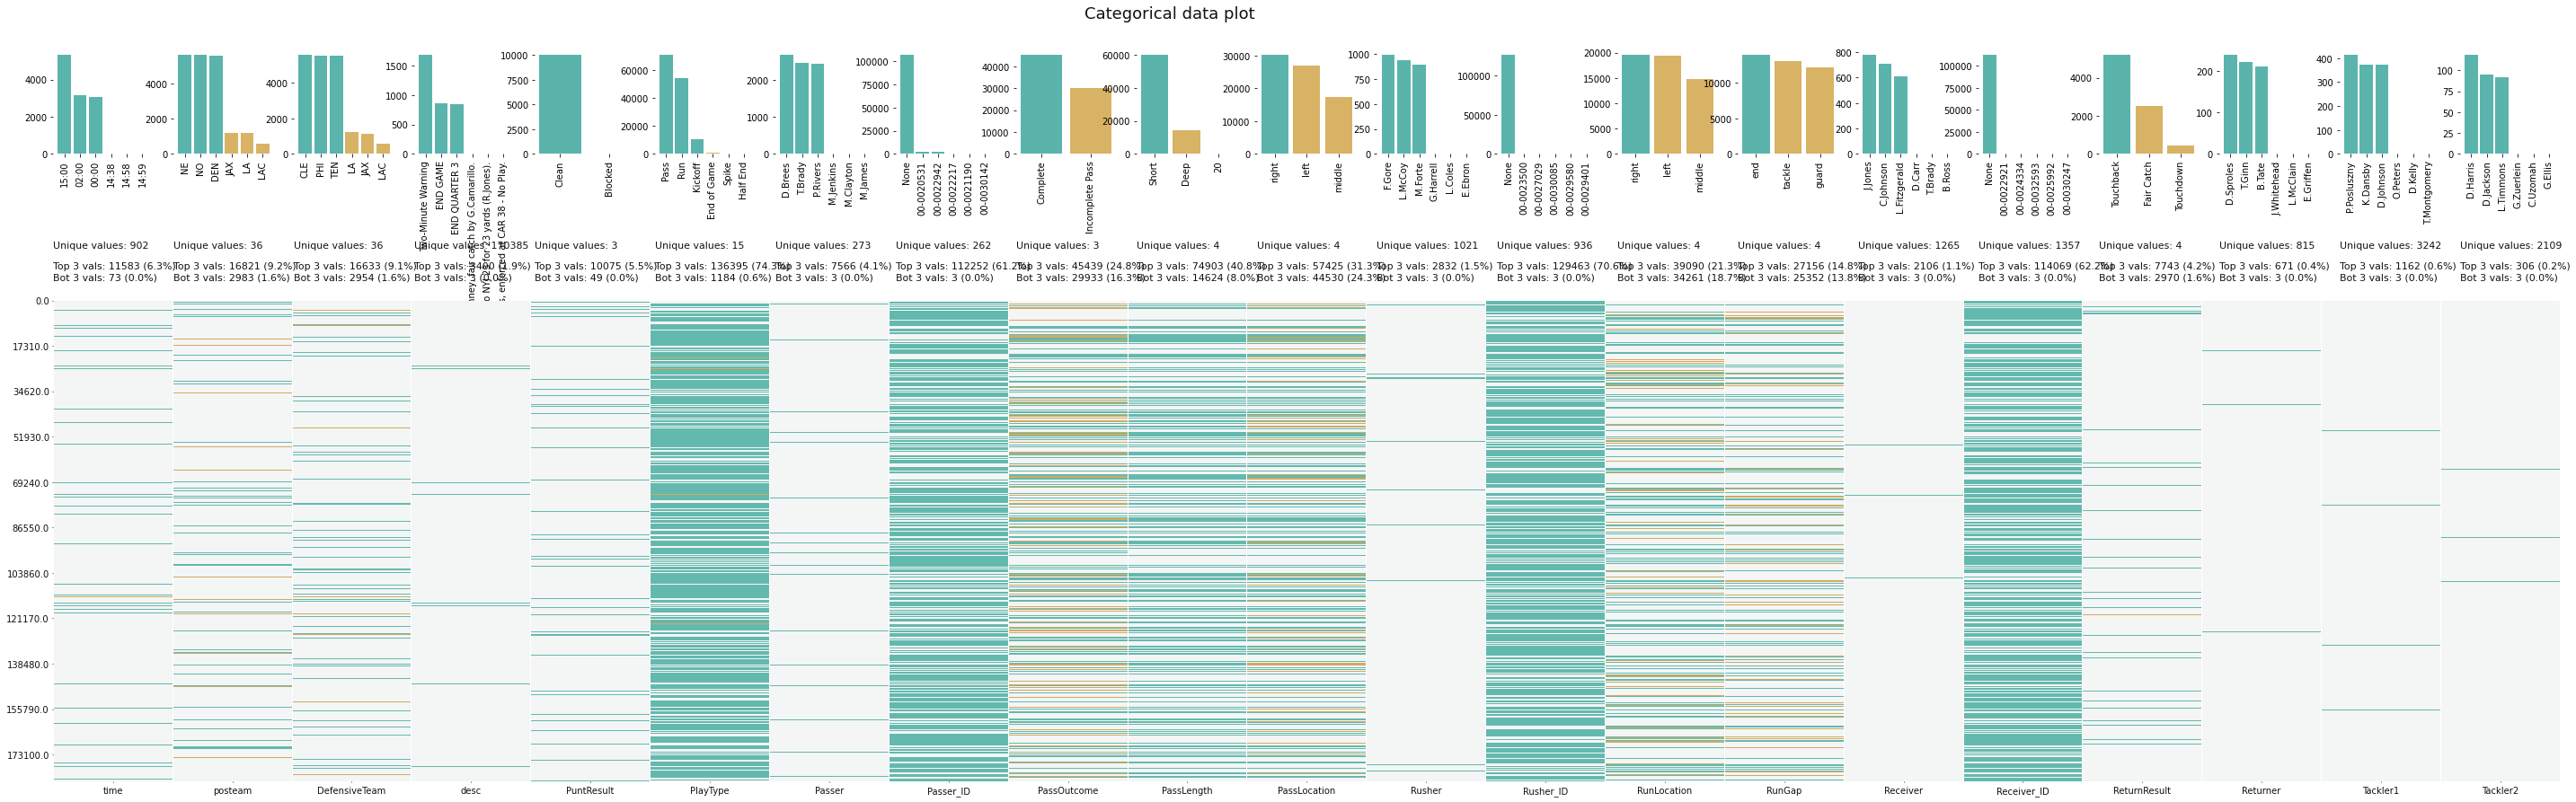

In [ ]:
klib.cat_plot(df, figsize=(50,15))

# **Save Plot as a PDF file**

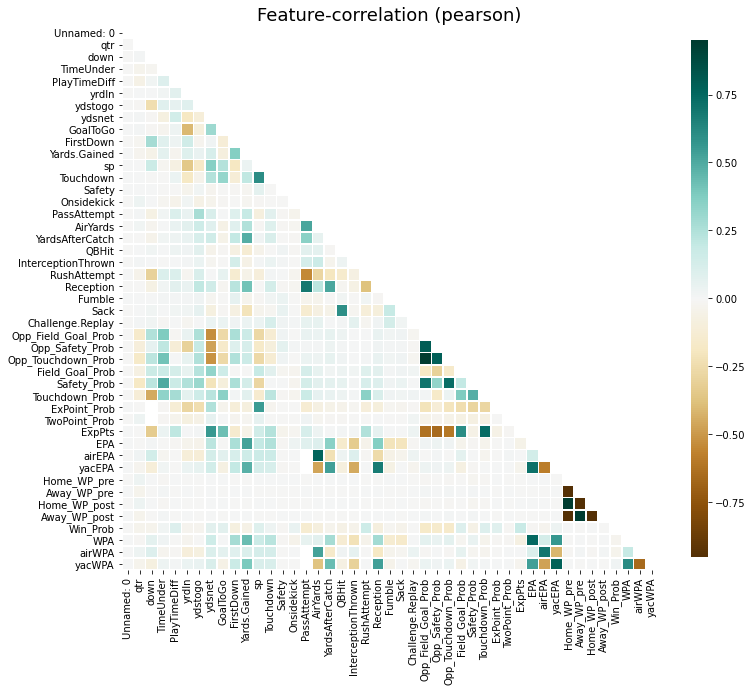

In [ ]:
plot = klib.corr_plot(df_cleaned, annot=False, figsize=(12,10))

In [ ]:
plot.figure.savefig('figure.pdf')